# Principal Component Analysis

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.The idea of PCA is to reduce the number of variables of a data set, while preserving as much information as possible.

In this cookbook we will be implementing PCA to reduce the number of variables in our data set by preserving 95% of the data’s variance  


In [44]:
# load the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn import preprocessing 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


The first step is to read the data.
Please refer to the Random Forest Regression Cookbook for a detailed explanation about the feature engineering. Here we will be reading the dataset with the new variables obtained after feature engineering.

In [2]:

dust_df = pd.read_csv('../saharan_dust_met_cat_vars.csv', index_col='time')


In [3]:
dust_df

,PM10,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,WIND_DIR,RAIN
time,,,,,,,,,
1960-01-01,2000.1490,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,NE,0
1960-01-02,4686.5370,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,NE,0
1960-01-03,5847.7515,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,NE,0
1960-01-04,5252.0586,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,NE,0
1960-01-05,3379.3190,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,NE,0
...,...,...,...,...,...,...,...,...,...
2010-12-27,2681.4685,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,NE,4
2010-12-28,1345.8488,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,NE,4
2010-12-29,4500.9810,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,NE,4


### One Hot Encoding

Let's look at the unique values of the WIND_DIR feature

In [4]:
dust_df['WIND_DIR'].unique()

array(['NE', 'NW', 'SE', 'SW'], dtype=object)

Since WIND_DIR is a categorical variable, we have to perform One Hot Encoding(OHE). One Hot Encoding creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. One Hot Encoding is the process of creating dummy variables.

In [5]:
one_hot = pd.get_dummies(dust_df['WIND_DIR'], dtype=int)

In [6]:
one_hot

,NE,NW,SE,SW
time,,,,
1960-01-01,1,0,0,0
1960-01-02,1,0,0,0
1960-01-03,1,0,0,0
1960-01-04,1,0,0,0
1960-01-05,1,0,0,0
...,...,...,...,...
2010-12-27,1,0,0,0
2010-12-28,1,0,0,0
2010-12-29,1,0,0,0


In [7]:
df_new = dust_df.drop('WIND_DIR', axis=1)

Let's now join the One Hot Encoded Fatures into the original dataframe

In [8]:
df_new = df_new.join(one_hot)

In [9]:
df_new

,PM10,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,RAIN,NE,NW,SE,SW
time,,,,,,,,,,,,
1960-01-01,2000.1490,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,0,1,0,0,0
1960-01-02,4686.5370,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,0,1,0,0,0
1960-01-03,5847.7515,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,0,1,0,0,0
1960-01-04,5252.0586,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,0,1,0,0,0
1960-01-05,3379.3190,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,2681.4685,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,4,1,0,0,0
2010-12-28,1345.8488,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,4,1,0,0,0
2010-12-29,4500.9810,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,4,1,0,0,0


In [10]:
X_features = df_new.drop(labels='PM10', axis = 1)

In [11]:
X_features

,T2,rh2,slp,PBLH,wind_speed_10m,wind_speed_925hPa,RAIN,NE,NW,SE,SW
time,,,,,,,,,,,
1960-01-01,288.24875,32.923786,1018.89420,484.91812,6.801503,13.483623,0,1,0,0,0
1960-01-02,288.88450,30.528862,1017.26575,601.58310,8.316340,18.027075,0,1,0,0,0
1960-01-03,290.97128,26.504536,1015.83514,582.38540,9.148216,17.995173,0,1,0,0,0
1960-01-04,292.20060,30.678936,1013.92230,555.11860,8.751743,15.806478,0,1,0,0,0
1960-01-05,293.06076,27.790462,1011.94934,394.95440,6.393228,9.160809,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-27,292.38474,18.858383,1011.69574,315.81320,4.749993,7.846004,4,1,0,0,0
2010-12-28,291.46680,26.357006,1010.66340,232.03355,3.051484,3.346668,4,1,0,0,0
2010-12-29,289.62990,23.169529,1014.53740,557.29913,6.249619,13.007574,4,1,0,0,0


We will now separate out the features and the target variable 

In [12]:
X = df_new.drop(labels='PM10', axis=1).values
y = df_new['PM10'].values

In [13]:
X.shape

(18466, 11)

In [14]:
y.shape

(18466,)

Here we will be splitting the data into training and testing data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

Feature scaling is a vital pre-processing step in machine learning that involves transforming numerical features to a common scale. Scaling techniques aim to normalize the range, distribution, and magnitude of features, reducing potential biases and inconsistencies that may arise from variations in their values.

The next step is to scale the data. We will be using RobustScaler for scaling.
RobustScaler is an algorithm that scales features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile) but can be configured.

When applying feature scaling, it’s crucial to fit the scaler on the training data and then use the same scaler to transform the test data. This ensures consistency and prevents data leakage.

In [16]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We will now use Scikit-Learn's PCA estimator to find out the number of principal components we need. Since we are not sure how many principal components we need for this data, we will use Minka’s MLE to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'

In [17]:
pca = PCA(n_components = 'mle', svd_solver = 'full')

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [18]:
#Print dataset shape before and after PCA
print(f'\nTraining Data shape: {X_train.shape}')
print(f'PCA Training Data shape: {X_train_pca.shape}')


Training Data shape: (14772, 11)
PCA Training Data shape: (14772, 10)


From the Scikit-learn implementation, we can get the information about the explained variance and plot the cumulative variance.
The importance of each component is represented by the explained variance ratio, which indicates the portion of the variance that lies along each principal component.

In [19]:
explained_variance = pca.explained_variance_ratio_

In [20]:
explained_variance

array([0.37721146, 0.25138801, 0.14908775, 0.12167106, 0.04221808,
       0.01815109, 0.01510624, 0.01231552, 0.00793525, 0.00491554])

By summing the explained variance ratio of the first $N{pc}$ components, we obtain the so-called cumulative explained variance

In [21]:
cumulative_var_ratio = np.cumsum(explained_variance)

In [22]:
cumulative_var_ratio

array([0.37721146, 0.62859947, 0.77768722, 0.89935828, 0.94157636,
       0.95972744, 0.97483369, 0.98714921, 0.99508446, 1.        ])

The minimum number of principal components required to preserve the 95% of the data’s variance can be computed with the following command

In [23]:
d = np.argmax(cumulative_var_ratio >= 0.95) + 1
d

6

Let's plot the cumulative variance for the number of principal components



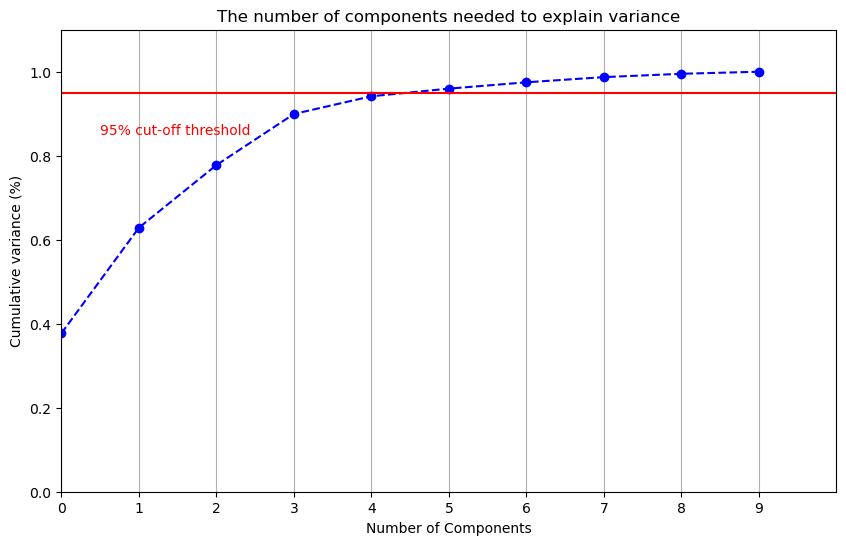

In [24]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
xi = np.arange(0,10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.xlim([0,10])
plt.ylim([0.0,1.1])
plt.plot(xi, y, marker='o', linestyle='--', color='b')


plt.xlabel('Number of Components')
plt.xticks(np.arange(0,10, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=10)

ax.grid(axis='x')
plt.show()

This plot illustrates how the cumulative variance explained by principal components increases as more components are added. It helps determine the number of components needed to capture the majority of the variance in the dataset. 
Hence we can conclude from the plot and from calculation that in order to preserve 95% of the data's variance, we need 6 principal components.

Now let's run the PCA estimator with n_components set to 6

In [25]:
pca = PCA(n_components = 6, svd_solver = 'full')

X_train_pca_6 = pca.fit_transform(X_train)
X_test_pca_6 = pca.transform(X_test)


In [26]:
print(pca.components_)

[[-3.61778391e-01 -3.38369866e-01  4.51569378e-01 -1.77126326e-01
   4.96939306e-01  4.18413802e-01 -1.24063367e-01  2.35693347e-01
  -5.11995608e-02 -3.42324113e-02 -1.50261375e-01]
 [-1.62573966e-01  6.98539654e-01  3.53914136e-01  4.49498676e-01
   2.20612234e-01  1.69030327e-01  1.78128216e-01 -1.60511838e-01
  -7.38533169e-03  1.53053509e-02  1.52591819e-01]
 [-3.29626953e-01  2.98494821e-01  2.85023040e-01 -6.97675877e-01
  -2.57328897e-01 -2.60838223e-01  3.15504826e-01  1.39799500e-02
   1.47564894e-03  7.00179657e-04 -1.61557786e-02]
 [ 1.65111754e-01 -2.63244559e-01 -7.53441771e-02  1.07850312e-01
   1.06558189e-01  1.34670039e-01  9.20119383e-01  8.20988846e-02
  -1.97557125e-02 -9.40257531e-03 -5.29405967e-02]
 [ 1.43147624e-01  3.46012782e-01 -5.56860207e-01 -4.37957853e-01
   4.84413002e-01  2.75072184e-01 -1.18798913e-02  8.92497782e-03
  -1.35216504e-01 -3.95280255e-02  1.65819552e-01]
 [-9.90391435e-02 -2.46357985e-01  2.31771115e-02 -1.33495943e-01
   1.09713471e-01  

In [27]:
#Print dataset shape before and after PCA
print(f'\nTraining Data shape: {X_train.shape}')
print(f'PCA Training Data shape: {X_train_pca_6.shape}')


Training Data shape: (14772, 11)
PCA Training Data shape: (14772, 6)


In [28]:
# number of components
n_pcs= pca.components_.shape[0]
n_pcs

6

We now know that out of 11 features, 6 features were selected by PCA as relevant features but we do not know what those 6 features are. We can do that by first finding the index of the feature with the largest absolute value in each principal component's loading vector using list comprehension. Then we can map these indices to their corresponding feature names from the original dataset. The next step is to create a dictionary that associates each principal component with its most important feature and convert the dictionary to a dataframe



In [29]:
# get the index of the most important feature on EACH component(largest absolute value)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [30]:
#get the corresponding feature names from the original dataset
initial_feature_names = list(X_features.columns.values)
initial_feature_names

['T2',
 'rh2',
 'slp',
 'PBLH',
 'wind_speed_10m',
 'wind_speed_925hPa',
 'RAIN',
 'NE',
 'NW',
 'SE',
 'SW']

In [31]:
# map the indices to their corresponding feature names from the original dataset
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [32]:
# create a dictionary that associates each principal component with its most important feature 
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

In [33]:
# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [34]:
df

,0,1
0,PC1,wind_speed_10m
1,PC2,rh2
2,PC3,PBLH
3,PC4,RAIN
4,PC5,slp
5,PC6,NE


Now we know the 6 principal components that were selected by the PCA estimator. 
They are 
- wind_speed_10m
- rh2
- PBLH
- RAIN
- slp
- NE

### Let's visualize our results

The PCA-transformed data is clustered using KMeans with 6 clusters.

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K clusters. It works by iteratively assigning each data point to the nearest centroid and then updating the centroids based on the mean of the data points assigned to each cluster. 

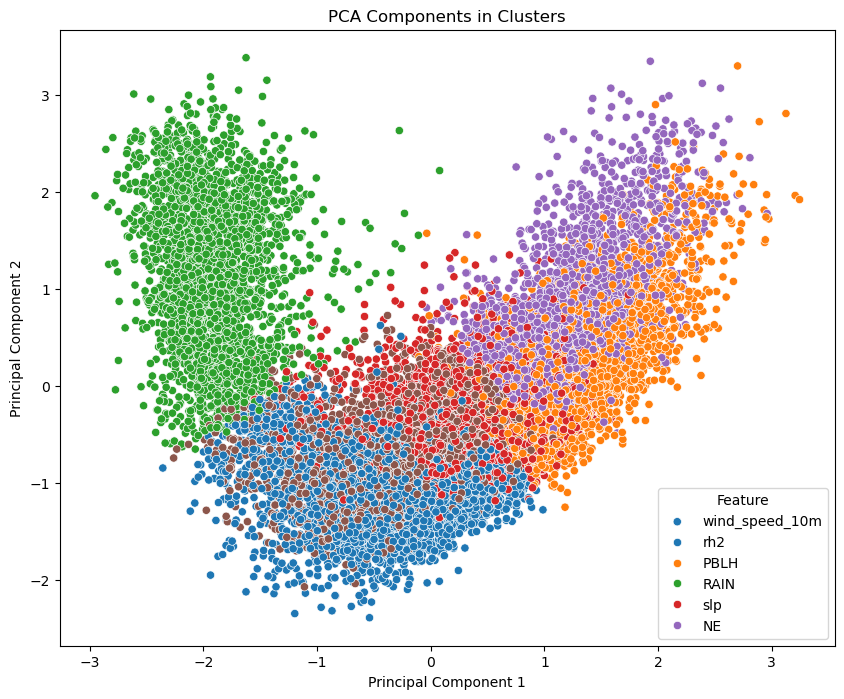

In [48]:


# Cluster the PCA-transformed data
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca_6)

# Create a DataFrame combining PCA components and cluster labels
pca_cluster_df = pd.DataFrame(X_train_pca_6, columns=[f'PC{i+1}' for i in range(6)])
pca_cluster_df['Cluster'] = cluster_labels

# Get the feature names associated with each cluster
n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = list(X_features.columns.values)
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# Plot the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_cluster_df, palette='tab10')
plt.title('PCA Components in Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create custom legend
legend_labels = {i: most_important_names[i] for i in range(len(most_important_names))}
plt.legend(title='Feature', labels=legend_labels.values())

plt.show()


Here the PCA components and cluster labels are combined into a DataFrame. A scatter plot is created where each point represents a data sample, and the points are colored based on their cluster assignment.

In the upcoming notebook, we'll delve into Self-Organizing Maps (SOM) and explore their application on this dataset. We will discover how SOMs are leveraged for clustering and visualization, offering insights into the underlying structures and patterns within the data.